In [3]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

In [16]:
mode="del"
datasets = {'citeseer', 'cora_ml', 'pubmed'}
folder = './results'
approaches = ['optim', 'poly',]

colors = [(179, 106, 111), (250, 192, 61), (213, 168, 130), (80, 138, 178), (161, 208, 199)]
colors = np.array(colors) / 255

dataset_map = {
    'cora_ml': {
        'name': 'Cora',
        'color': colors[0],
        'line_style': '-',
    },
    'citeseer': {
        'name': 'Citeseer',
        'color': colors[1],
        'line_style': '--',
    },
    'pubmed': {
        'name': 'Pubmed',
        'color': colors[2],
        'line_style': '-.',
    }
}

approach_map = {
    'optim': {
        'name': 'Dual',
        'color': colors[0],
        'line_style': '--',
    },
    'poly': {
        'name': 'Poly',
        'color': colors[1],
        'line_style': '-',
    },
}

mode_map = {
    'del': 'deletion',
    'add': 'addition',
}

collective_robustness = {}
for dataset in datasets:
    collective_robustness[dataset] = {}
    for approach in approaches:
        collective_robustness[dataset][approach] = np.load(f"{folder}/{approach}/{dataset}_attr_{mode}.npy", allow_pickle=True)[()]

plt.style.use(['ieee', 'bright'])

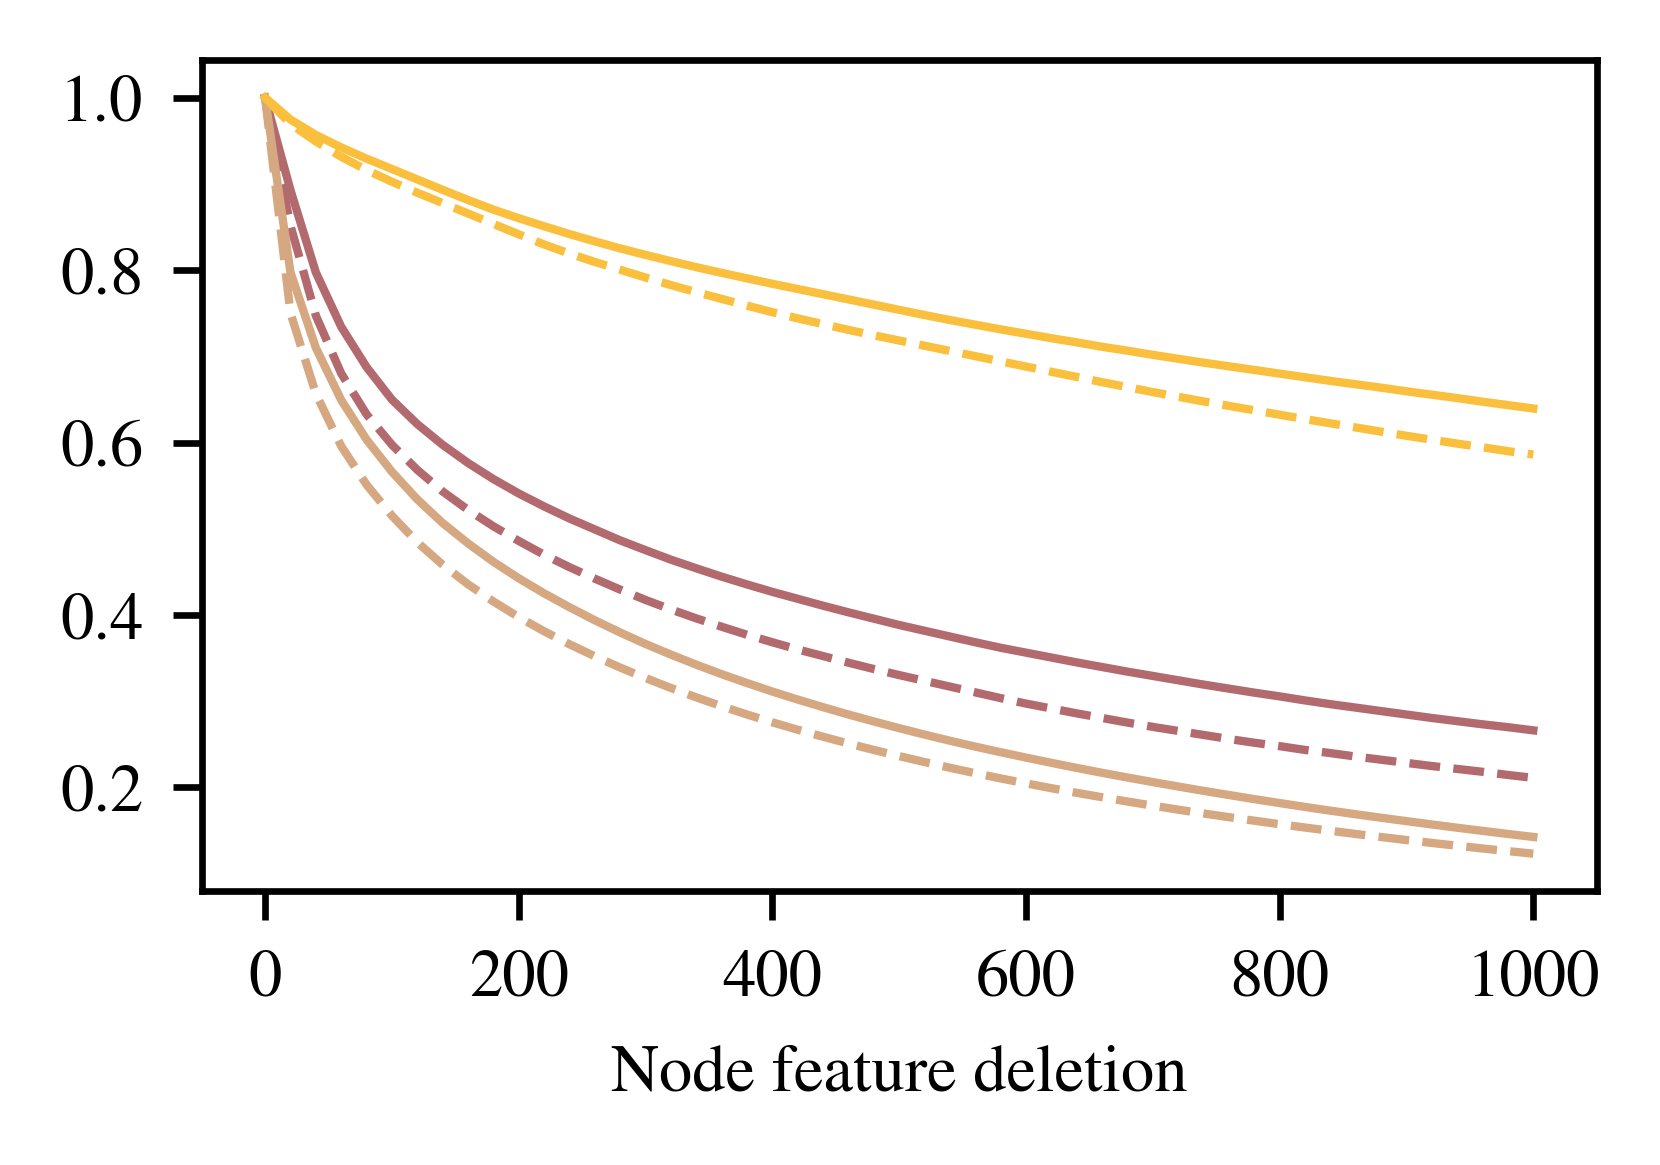

In [17]:
fig = plt.figure(figsize=(3, 3 * 3 / 5))



ax = plt.gca()
perturbations = range(1001)

for dataset in datasets:    
    color = dataset_map[dataset]['color']
    name = dataset_map[dataset]['name']
    for approach in approaches:
        linestyle = approach_map[approach]['line_style']
        result = collective_robustness[dataset][approach]
        if linestyle == '-':
            ax.plot(result['collective_x_axis'], result[f'collective_{mode}'], label=name, linewidth=1, linestyle=linestyle, color=color)
        else:
            ax.plot(result['collective_x_axis'], result[f'collective_{mode}'], linewidth=1, linestyle=linestyle, color=color)

# plt.legend(fontsize=5)
plt.xlabel(f'Node feature {mode_map[mode]}')

plt.savefig(f'./plots/attr_{mode}', dpi=300, bbox_inches = "tight")
plt.show()